In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
df = pd.read_csv('Elon_musk.csv',encoding='latin1' )

In [3]:
df.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [4]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
df.head(10)

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj
6,7,"Frodo was the underdoge,\nAll thought he would..."
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...
9,10,The most entertaining outcome is the most likely


In [6]:
df['len']= df['Text'].apply(len)

In [7]:
df.head()

,Unnamed: 0,Text,len
0,1,@kunalb11 Im an alien,22
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,3,@joerogan @Spotify Great interview!,35
3,4,@gtera27 Doge is underestimated,31
4,5,@teslacn Congratulations Tesla China for amazi...,104


In [8]:
df.rename(columns={'Unnamed: 0': 'Index'}, inplace=True)

In [9]:
df.head()

,Index,Text,len
0,1,@kunalb11 Im an alien,22
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,3,@joerogan @Spotify Great interview!,35
3,4,@gtera27 Doge is underestimated,31
4,5,@teslacn Congratulations Tesla China for amazi...,104


<Axes: >

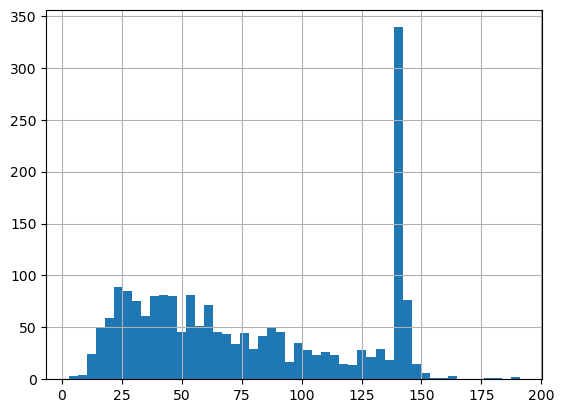

In [10]:
df['len'].hist(bins=50)

In [11]:
df['len'].describe()

count    1999.000000
mean       78.442721
std        44.617029
min         3.000000
25%        39.000000
50%        68.000000
75%       129.000000
max       191.000000
Name: len, dtype: float64

In [12]:
df[df['len']==22]

,Index,Text,len
0,1,@kunalb11 Im an alien,22
44,45,Hodl the rainforests!!,22
135,136,@GameSpot <U+0001F440>,22
152,153,@anbuteau <U+0001F917>,22
265,266,@lexfridman Absolutely,22
299,300,@benmezrich Me neither,22
363,364,@ashleevance Westworld,22
389,390,@lexfridman Good point,22
642,643,@Astronomiaum Deveras!,22
724,725,Shakes fist at entropy,22


In [13]:
stop_words = set(stopwords.words('english'))

In [14]:
def clean_text(text):
    text = ' '.join(word.strip(string.punctuation) for word in text.split() if not word.startswith('@') and 'http' not in word)
    text = text.lower()
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    return ' '.join(tokens)

In [15]:
df['Cleaned_Text'] = df['Text'].apply(clean_text)

In [16]:
df.head()

,Index,Text,len,Cleaned_Text
0,1,@kunalb11 Im an alien,22,alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,ray tracing cyberpunk hdr tried
2,3,@joerogan @Spotify Great interview!,35,great interview
3,4,@gtera27 Doge is underestimated,31,doge underestimated
4,5,@teslacn Congratulations Tesla China for amazi...,104,congratulations tesla china amazing execution ...


In [17]:
df.loc[df['len'] == 22, 'Text']

0       @kunalb11 Im an alien
44      Hodl the rainforests!!
135     @GameSpot <U+0001F440>
152     @anbuteau <U+0001F917>
265     @lexfridman Absolutely
299     @benmezrich Me neither
363     @ashleevance Westworld
389     @lexfridman Good point
642     @Astronomiaum Deveras!
724     Shakes fist at entropy
745     @dana_e_morgan Sure is
976     @PlayOverwatch Sweet 

1133    @MKBHD Its next-level
1204    What cant we predict?
1226    @teslaownersSV cgi irl
1521    @NatGeo Must be aliens
1607    @Teslarati No surprise
1616    @archillect Twin Peaks
1851    @PPathole <U+0001F923>
Name: Text, dtype: object

In [18]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [19]:
sia = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Cleaned_Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

In [20]:
df['Sentiment'] = df['Sentiment_Score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

In [21]:
df.head()

,Index,Text,len,Cleaned_Text,Sentiment_Score,Sentiment
0,1,@kunalb11 Im an alien,22,alien,0.0000,Neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,ray tracing cyberpunk hdr tried,0.0000,Neutral
2,3,@joerogan @Spotify Great interview!,35,great interview,0.6249,Positive
3,4,@gtera27 Doge is underestimated,31,doge underestimated,-0.2732,Negative
4,5,@teslacn Congratulations Tesla China for amazi...,104,congratulations tesla china amazing execution ...,0.8271,Positive


In [22]:
df[df['Sentiment']== 'Positive']

,Index,Text,len,Cleaned_Text,Sentiment_Score,Sentiment
2,3,@joerogan @Spotify Great interview!,35,great interview,0.6249,Positive
4,5,@teslacn Congratulations Tesla China for amazi...,104,congratulations tesla china amazing execution ...,0.8271,Positive
5,6,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,49,happy new year ox,0.5719,Positive
7,8,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),46,haha thanks,0.7096,Positive
8,9,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,89,indeed tweets definitely represent time alloca...,0.4019,Positive
...,...,...,...,...,...,...
1989,1990,"@buzzindelhi Sorry, should hopefully be soon!",45,sorry hopefully soon,0.3400,Positive
1990,1991,"@kenyanwalstreet Not actually a payout, just a...",140,actually payout vesting stock options may neve...,0.0762,Positive
1991,1992,@IheartTesla No easy way to answer this in a t...,127,easy way answer tweet helping dire brain injur...,0.2732,Positive
1995,1996,@PPathole Make sure to read ur terms &amp; con...,77,make sure read ur terms amp conditions clickin...,0.5994,Positive


In [23]:
df[df['Sentiment']== 'Negative']

,Index,Text,len,Cleaned_Text,Sentiment_Score,Sentiment
3,4,@gtera27 Doge is underestimated,31,doge underestimated,-0.2732,Negative
6,7,"Frodo was the underdoge,\nAll thought he would...",96,frodo underdoge thought would fail,-0.5423,Negative
20,21,@freewalletorg Any crypto wallet that wont gi...,101,crypto wallet give private keys avoided costs,-0.3400,Negative
21,22,@freewalletorg Your app sucks,29,app sucks,-0.3612,Negative
25,26,@RationalEtienne @Adamklotz_ Starlink is a sta...,144,starlink staggeringly difficult technical amp ...,-0.3612,Negative
...,...,...,...,...,...,...
1960,1961,@vicentes @TeslaratiTeam @Teslarati It may be ...,89,may able reach low states charge,-0.2500,Negative
1961,1962,"@jgrano305 @TeslaratiTeam @Teslarati No, as ra...",95,range would unacceptably low lt mile epa,-0.2732,Negative
1965,1966,@PPathole That is the near-term danger of AI,44,danger ai,-0.5267,Negative
1975,1976,@RationalEtienne @flcnhvy @PPathole @IheartTes...,81,death loss information,-0.7351,Negative


In [24]:
df[df['Sentiment']== 'Neutral']

,Index,Text,len,Cleaned_Text,Sentiment_Score,Sentiment
0,1,@kunalb11 Im an alien,22,alien,0.0,Neutral
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82,ray tracing cyberpunk hdr tried,0.0,Neutral
10,11,@GiveDirectly Just sent some,28,sent,0.0,Neutral
12,13,https://t.co/3rWE9uHSTS,23,,0.0,Neutral
13,14,@geoffkeighley @UnrealEngine Its getting real,46,getting real,0.0,Neutral
...,...,...,...,...,...,...
1983,1984,@EvaFoxU @Tesla Berlin Model Y is the one to w...,114,berlin model one watch revolution automotive b...,0.0,Neutral
1992,1993,AI symbiosis while u wait,25,ai symbiosis u wait,0.0,Neutral
1993,1994,@vistacruiser7 @flcnhvy Theres some of that too,48,,0.0,Neutral
1994,1995,"@flcnhvy True, it sounds so surreal, but the n...",144,true sounds surreal negative propaganda still ...,-0.0,Neutral
